In [7]:
'''Trains a simple convnet on the Zalando MNIST dataset.
Gets to 81.03% test accuracy after 30 epochs
(there is still a lot of margin for parameter tuning).
3 seconds per epoch on a GeForce GTX 980 GPU with CuDNN 5.
'''

from __future__ import print_function
import numpy as np
import mnist_reader as mr
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
x_train, y_train = mr.load_mnist('data/fashion', kind='train')
x_test, y_test = mr.load_mnist('data/fashion', kind='t10k')

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

sgd = keras.optimizers.SGD(lr=0.01)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

record = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 162s 3ms/step - loss: 1.4086 - acc: 0.5003 - val_loss: 0.7121 - val_acc: 0.7489
Epoch 2/12
48000/48000 [==============================] - 200s 4ms/step - loss: 0.7973 - acc: 0.7088 - val_loss: 0.6031 - val_acc: 0.7712
Epoch 3/12
48000/48000 [==============================] - 353s 7ms/step - loss: 0.7009 - acc: 0.7382 - val_loss: 0.5625 - val_acc: 0.7810
Epoch 4/12
48000/48000 [==============================] - 208s 4ms/step - loss: 0.6557 - acc: 0.7558 - val_loss: 0.5347 - val_acc: 0.7969
Epoch 5/12
48000/48000 [==============================] - 213s 4ms/step - loss: 0.6255 - acc: 0.7655 - val_loss: 0.5260 - val_acc: 0.8083
Epoch 6/12
48000/48000 [==============================] - 148s 3ms/step - loss: 0.5979 - acc: 0.7758 - val_loss: 0.4936 - val_acc: 0.8171
Epoch 7/12
48000/48000 [=========================

### ＊report 在圖的下方

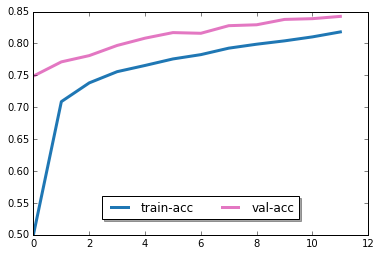

In [25]:
#Plot iter accuracy curve
#Store your every iter number and accuracy in tow numpy array "iter_log" and "accuracy_log"
import matplotlib.pyplot as plt
%matplotlib inline
iter_log = np.empty((0,12),int)
train_loss = np.empty((0,12),int)
val_loss = np.empty((0,12),int)
for i in range(0,12):
    iter_log = np.append(iter_log,i)
    
train_acc = record.history['acc']
val_acc = record.history['val_acc']

ax = plt.subplot(111)
plt.plot(iter_log, train_acc, label='train-acc', color="#1f77b4", linewidth=3)
plt.plot(iter_log, val_acc, label='val-acc', color="#e377c2", linewidth=3)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2),  shadow=True, ncol=2)
plt.show()

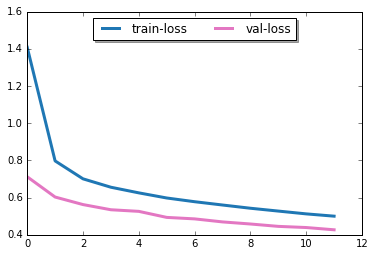

In [23]:
#Plot iter accuracy curve
#Store your every iter number and accuracy in tow numpy array "iter_log" and "accuracy_log"
import matplotlib.pyplot as plt
%matplotlib inline
iter_log = np.empty((0,12),int)
train_loss = np.empty((0,12),int)
val_loss = np.empty((0,12),int)
for i in range(0,12):
    iter_log = np.append(iter_log,i)
    
train_loss = record.history['loss']
val_loss = record.history['val_loss']

ax = plt.subplot(111)
plt.plot(iter_log, train_loss, label='train-loss', color="#1f77b4", linewidth=3)
plt.plot(iter_log, val_loss, label='val-loss', color="#e377c2", linewidth=3)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),  shadow=True, ncol=2)
plt.show()

**Fixed gradient descend : learning rate 固定在0.01,每一次更新都是乘這個值**

> ＊ sgd = keras.optimizers.SGD(lr=0.01) <br\>
> 1. test accuracy = 0.83 <br\>
> 2. 收斂速度不快，train acc第一個epoch只有收斂到50<br\>
> 3. ＊缺點：<br\>
>> a.training data太多，計算梯度時間會比較久，因為每次更新都是相似的樣本<br\>
>> b.無法進行online的更新

In [27]:
'''Trains a simple convnet on the Zalando MNIST dataset.
Gets to 81.03% test accuracy after 30 epochs
(there is still a lot of margin for parameter tuning).
3 seconds per epoch on a GeForce GTX 980 GPU with CuDNN 5.
'''

from __future__ import print_function
import numpy as np
import mnist_reader as mr
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
x_train, y_train = mr.load_mnist('data/fashion', kind='train')
x_test, y_test = mr.load_mnist('data/fashion', kind='t10k')

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

sgd = keras.optimizers.SGD(lr=0.01,decay=0.000001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

record = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 156s 3ms/step - loss: 1.3599 - acc: 0.5232 - val_loss: 0.7456 - val_acc: 0.7073
Epoch 2/12
48000/48000 [==============================] - 148s 3ms/step - loss: 0.7895 - acc: 0.7107 - val_loss: 0.6063 - val_acc: 0.7750
Epoch 3/12
48000/48000 [==============================] - 156s 3ms/step - loss: 0.6956 - acc: 0.7431 - val_loss: 0.5544 - val_acc: 0.7906
Epoch 4/12
48000/48000 [==============================] - 152s 3ms/step - loss: 0.6483 - acc: 0.7606 - val_loss: 0.5243 - val_acc: 0.8042
Epoch 5/12
48000/48000 [==============================] - 152s 3ms/step - loss: 0.6142 - acc: 0.7710 - val_loss: 0.5202 - val_acc: 0.7991
Epoch 6/12
48000/48000 [==============================] - 152s 3ms/step - loss: 0.5881 - acc: 0.7818 - val_loss: 0.4982 - val_acc: 0.8067
Epoch 7/12
48000/48000 [=========================

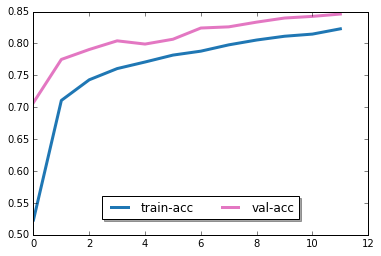

In [28]:
#Plot iter accuracy curve
#Store your every iter number and accuracy in tow numpy array "iter_log" and "accuracy_log"
import matplotlib.pyplot as plt
%matplotlib inline
iter_log = np.empty((0,12),int)
train_loss = np.empty((0,12),int)
val_loss = np.empty((0,12),int)
for i in range(0,12):
    iter_log = np.append(iter_log,i)
    
train_acc = record1.history['acc']
val_acc = record1.history['val_acc']

ax = plt.subplot(111)
plt.plot(iter_log, train_acc, label='train-acc', color="#1f77b4", linewidth=3)
plt.plot(iter_log, val_acc, label='val-acc', color="#e377c2", linewidth=3)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2),  shadow=True, ncol=2)
plt.show()

**Stochastic Gradient Descent (sgd) :** <br\>
> ＊ keras.optimizers.SGD( lr=0.01,decay=0.000001 )<br\>
> 1. SGD 拿到ouput new wight之後,馬上計算梯度,然后對參數做更新.<br\>
> 2. test accuracy = 0.84 <br\>
> 3. ＊ 優點：<br\>
>> a. 收斂速度較快
>> b. 可以 online 更新
>> c. 不會陷入局部的最低值

In [31]:
'''Trains a simple convnet on the Zalando MNIST dataset.
Gets to 81.03% test accuracy after 30 epochs
(there is still a lot of margin for parameter tuning).
3 seconds per epoch on a GeForce GTX 980 GPU with CuDNN 5.
'''

from __future__ import print_function
import numpy as np
import mnist_reader as mr
import keras
from keras.models import Sequential
from keras.callbacks import LearningRateScheduler
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

sgd = keras.optimizers.SGD(lr=0.01)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd,
              metrics=['accuracy'])

def scheduler(epoch):
    if epoch == 8:
         K.set_value(model.optimizer.lr,0.001)   
    return float(K.get_value(model.optimizer.lr)) 

new_lr = LearningRateScheduler(scheduler)

step_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2,
          callbacks=[new_lr])


score = model.evaluate(x_test, y_test, verbose=0)
print('Step update_rule : Test loss:', score[0])
print('Step update_rule : Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 175s 4ms/step - loss: 1.2753 - acc: 0.5503 - val_loss: 0.7063 - val_acc: 0.7358
Epoch 2/12
48000/48000 [==============================] - 179s 4ms/step - loss: 0.7801 - acc: 0.7164 - val_loss: 0.5929 - val_acc: 0.7732
Epoch 3/12
48000/48000 [==============================] - 198s 4ms/step - loss: 0.6844 - acc: 0.7472 - val_loss: 0.5637 - val_acc: 0.7946
Epoch 4/12
48000/48000 [==============================] - 154s 3ms/step - loss: 0.6432 - acc: 0.7640 - val_loss: 0.5305 - val_acc: 0.8042
Epoch 5/12
48000/48000 [==============================] - 152s 3ms/step - loss: 0.6092 - acc: 0.7728 - val_loss: 0.5139 - val_acc: 0.8087
Epoch 6/12
48000/48000 [==============================] - 166s 3ms/step - loss: 0.5864 - acc: 0.7835 - val_loss: 0.4908 - val_acc: 0.8155
Epoch 7/12
48000/48000 [==============================] - 194s 4ms/step - loss: 0.5651 - acc: 0.7925 - val_loss: 0.4727 - 

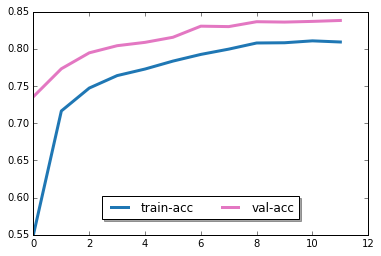

In [32]:
#Plot iter accuracy curve
#Store your every iter number and accuracy in tow numpy array "iter_log" and "accuracy_log"
import matplotlib.pyplot as plt
%matplotlib inline
iter_log = np.empty((0,12),int)
train_loss = np.empty((0,12),int)
val_loss = np.empty((0,12),int)
for i in range(0,12):
    iter_log = np.append(iter_log,i)
    
train_acc = step_history.history['acc']
val_acc = step_history.history['val_acc']

ax = plt.subplot(111)
plt.plot(iter_log, train_acc, label='train-acc', color="#1f77b4", linewidth=3)
plt.plot(iter_log, val_acc, label='val-acc', color="#e377c2", linewidth=3)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2),  shadow=True, ncol=2)
plt.show()

**Mini-batch Gradient Descent :** <br\>
> 1.fixed-gd & stochastic-gd 的折衷方法 <br\>
>> ＊ from keras.callbacks import LearningRateScheduler<br\>
＊ def scheduler(epoch)<br\>

> 2.前八次epoch都不換learning rate的值，剩下的才開始以一個batch為單位下降lr<br\>
>> ＊ if epoch == 8 : lr = 0.001 <br\>  
＊ else : lr = 0.01 <br\>  

> 3.test accuracy = 0.83.81 <br\>